# Forest fires

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

## Attribute Information:

1. **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. **month** - month of the year: 'jan' to 'dec' 
4. **day** - day of the week: 'mon' to 'sun' 
5. **FFMC** - FFMC index from the FWI system: 18.7 to 96.20 
6. **DMC** - DMC index from the FWI system: 1.1 to 291.3 
7. **DC** - DC index from the FWI system: 7.9 to 860.6 
8. **ISI** - ISI index from the FWI system: 0.0 to 56.10 
9. **temp** - temperature in Celsius degrees: 2.2 to 33.30 
10. **RH** - relative humidity in %: 15.0 to 100 
11. **wind** - wind speed in km/h: 0.40 to 9.40 
12. **rain** - outside rain in mm/m2 : 0.0 to 6.4 
13. **area** - the burned area of the forest (in ha): 0.00 to 1090.84

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data/forestfires.csv')
print(data.shape)
data.head()

(517, 13)


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [3]:
data.tail()

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

In [4]:
categorical_columns = ['month', 'day']

for c in categorical_columns:
    print(data[c].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [7]:
data[categorical_columns].describe()

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

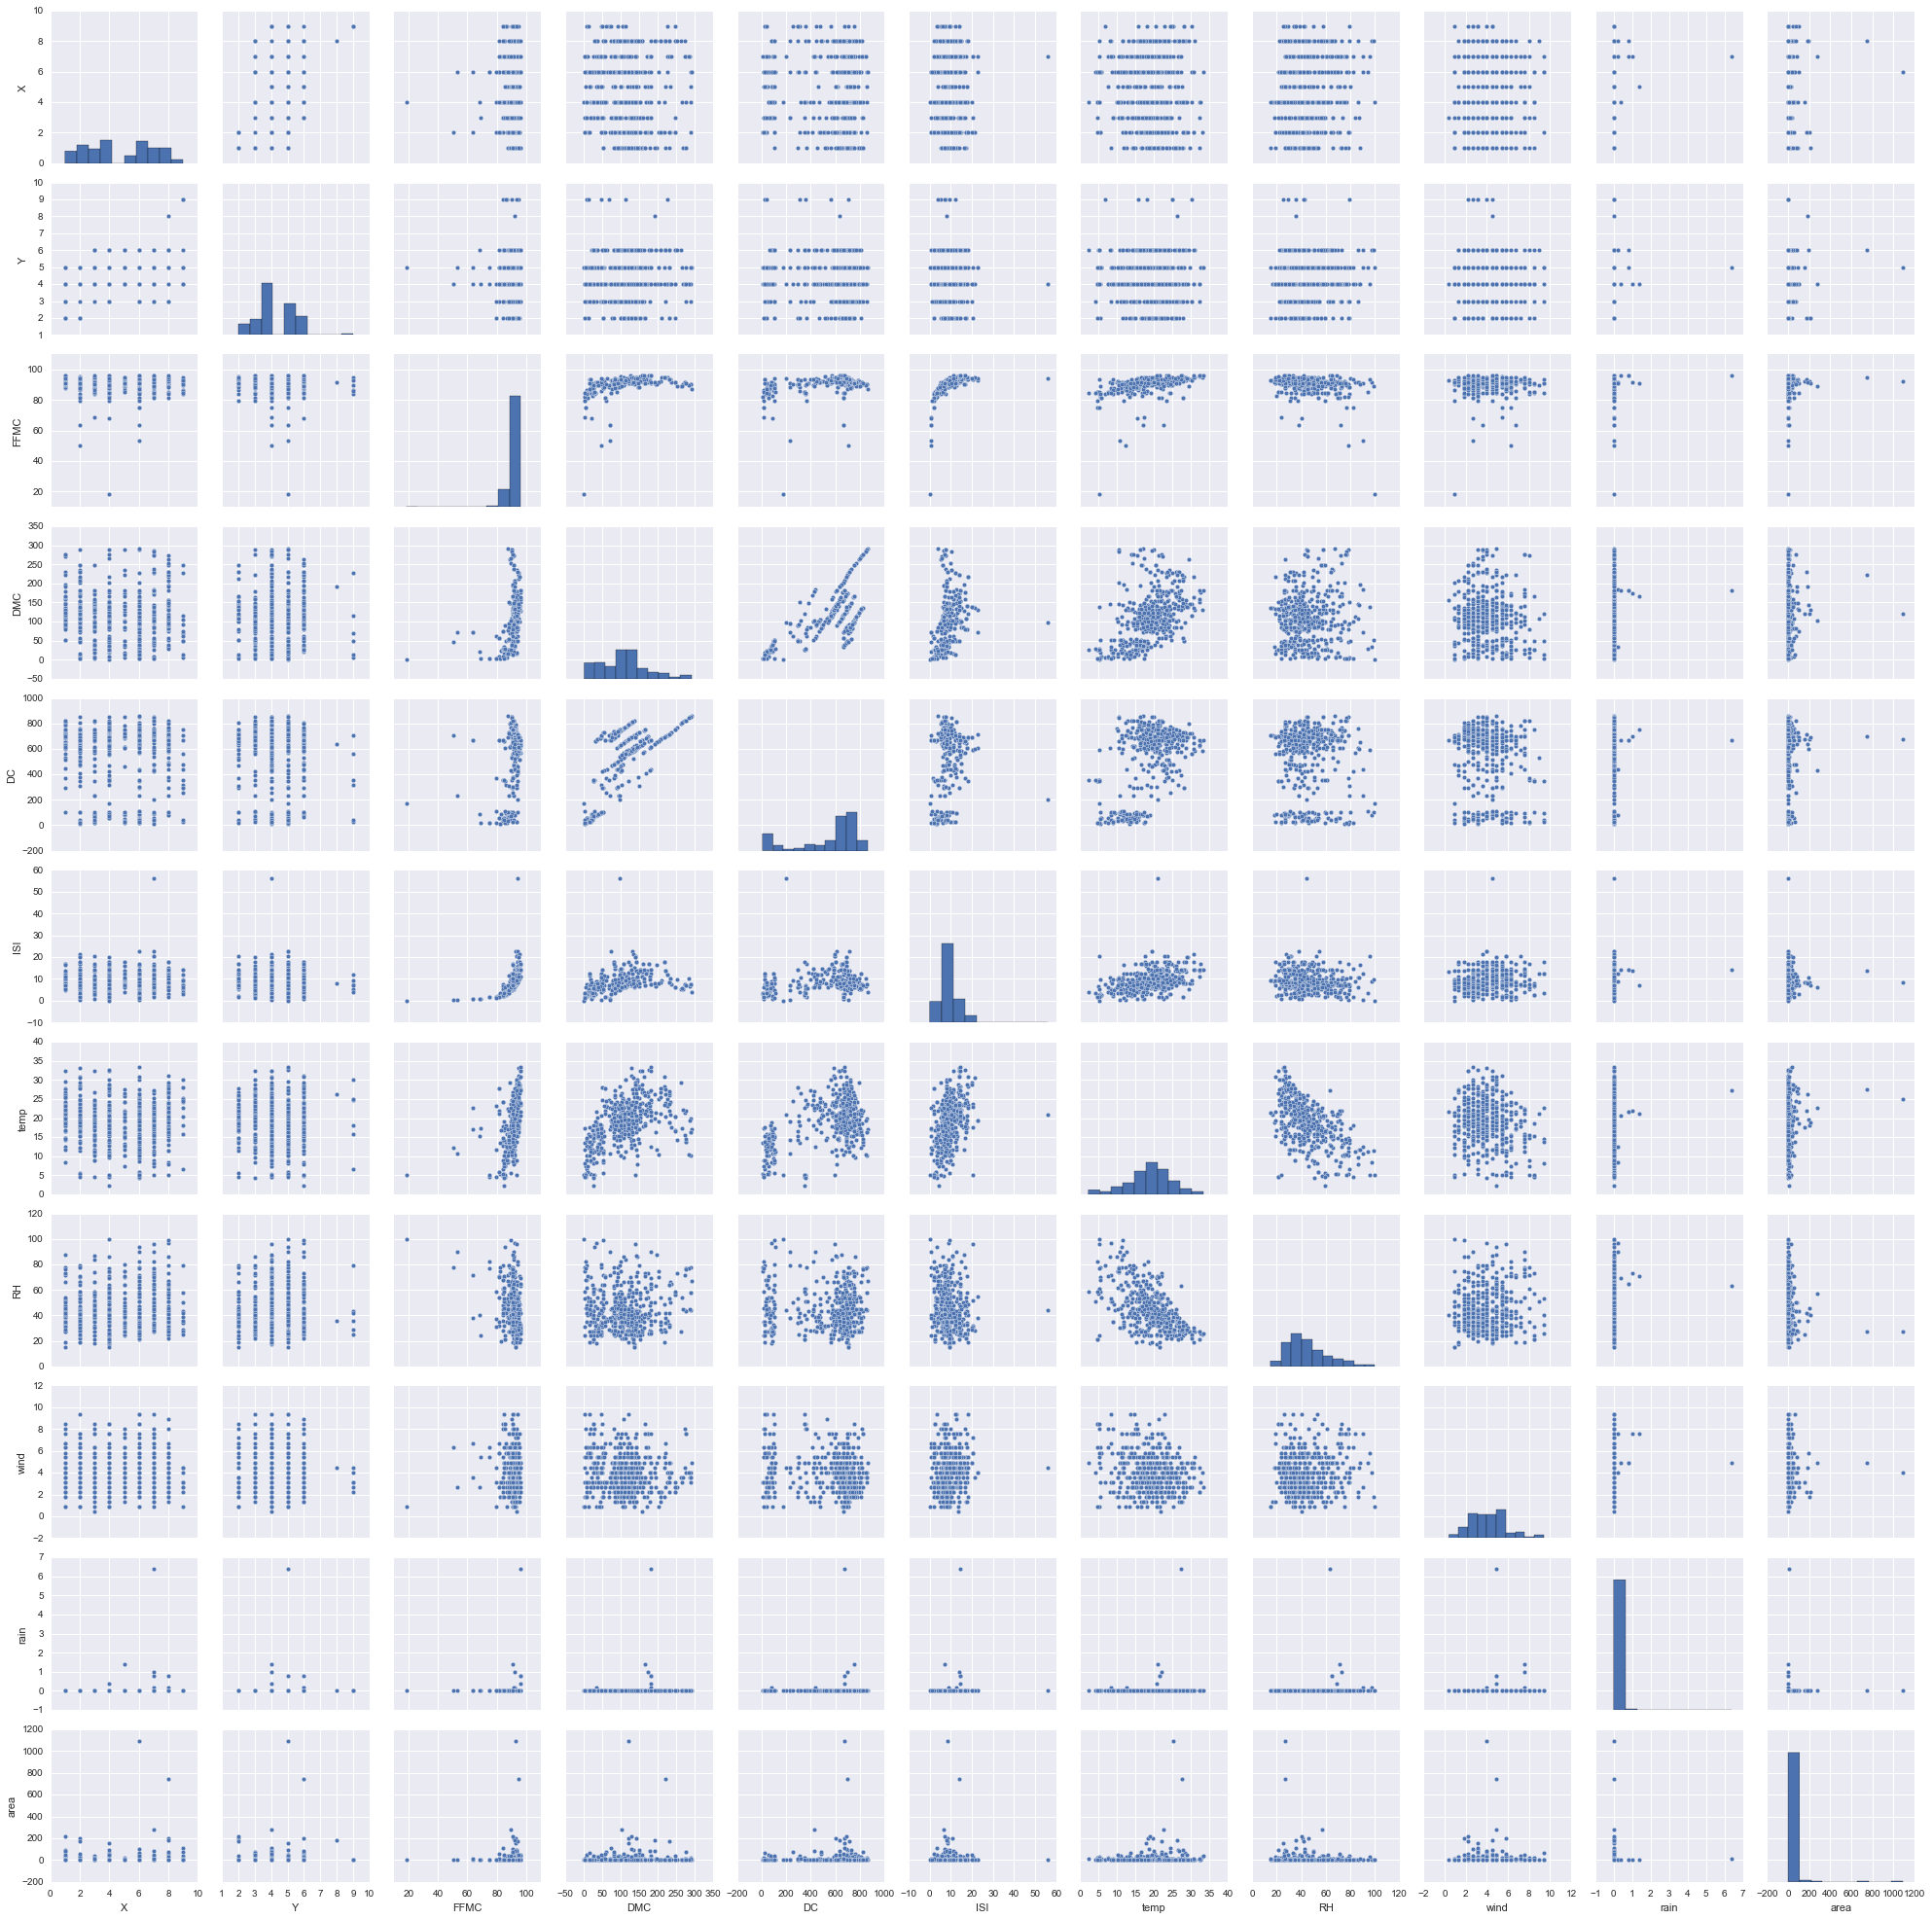

In [20]:
sns.pairplot(data)

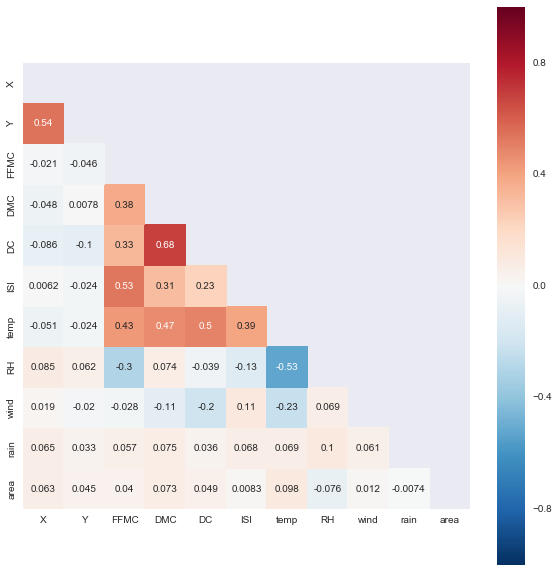

In [34]:
plt.subplots(figsize=(10,10))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, annot=True, mask=mask)

In [36]:
# Проверим есть ли пропуски.
data.count(axis=0)

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

# Категориальные признаки

1. One-hot-encoding - создаём разреженую матрицу, где в столбцах будут категориальные признаки, а в  ячейках - 0 или 1
2. Кодировать категории числами. Не понятно почему был выбран определенный порядок.
3. Кодировать частотами целевой переменной(бинарная классификация) или средним(медианой, модой) целевой переменной(регрессия)

In [8]:
# Для BaseLine попробуем one hot.

X = data.drop(['area'], axis=1)
y = data['area']

X = pd.get_dummies(X, columns=categorical_columns)
X.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [9]:
X.head(2)

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   ...     month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   ...             0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   ...             0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   

   day_wed  
0        0  
1        0  

[2 rows x 29 columns]

# Разбиение на тестовую и обучающую выборки

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(413, 29)
(104, 29)


# Алгоритмы машинного обучения (регрессии)

|Метод|Класс|
|---|---|
|kNN – kk ближайших соседей|	sklearn.neighbors.KNeighborsRegressor
|LDA – линейный дискриминантный анализ|	sklearn.lda.LDA
|QDA – квадратичный дискриминантный анализ|	sklearn.qda.QDA
|Logistic – логистическая регрессия|	sklearn.linear_model.LogisticRegression
|SVC – машина опорных векторов|	sklearn.svm.SVR
|Tree – деревья решений|	sklearn.tree.DecisionTreeClassifier
|RF – случайный лес|	sklearn.ensemble.RandomForestClassifier
|AdaBoost – адаптивный бустинг|	sklearn.ensemble.AdaBoostClassifier
|GBT – градиентный бустинг деревьев решений|	sklearn.ensemble.GradientBoostingClassifier

# Валидация

Методы машинного обучения есть суть минимизации ошибки предсказания.
Для оценки качества модели используют функции потерь.
В случае с регрессией интуитивно можно предположить, что нам надо оценивать на сколько сильно наши предсказания отклоняются от реальности.

## Метрики качества используемые в регрессиях

- mean_squared_error - The best value is 0.0 $$MSE(y, \hat{y})=\frac{1}{n} \sum_{i=0}^n{(y_i-\hat{y}_i)^2}$$
- mean_absolute_error - The best value is 0.0 $$MAE(y, \hat{y})=\frac{1}{n} \sum_{i=0}^n{|y_i-\hat{y}_i|}$$
- explained_variance_score - Best possible score is 1.0, lower values are worse. $$ev(y, \hat{y})=1-\frac{Var(y-\hat{y})}{Var(y)}$$
- r2_score - Best possible score is 1.0 and it can be negative. A сonstant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. $$R^2(y,\hat{y})=1-\frac{\sum_{i=0}^n{(y_i-\hat{y}_i)^2}}{\sum_{i=0}^n{(y_i-\overline{y}_i)^2}}, \overline{y} = \frac{1}{n}\sum_{i=0}^{n-1}{y_i}$$

## Кроссвалидация по фолдам

Готовую модель предсказаний проверяют на тестовой выборке. Возникает вопрос, на каких именно данных проверять, если у нас есть только обучающие данные? Для объективной верификации используют кросс-валидацию, т.е. тесты проводятся много раз по случайным разбиениям тренировочных данных.
То как выбирать подвыборки определяет стратегия разбиений в пакете `sklearn.model_selection`: `KFold`, `StratifiedKFold`, `ShuffleSplit`и так далее.

# kNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [14]:
from sklearn.model_selection import cross_val_score

def score(reg, x, y):
    metrcis = [('MSE', 'neg_mean_squared_error'), ('MAE', 'neg_mean_absolute_error'), ('R2', 'r2')]

    for m in metrcis:
        scores = cross_val_score(reg, x, y, cv=5, scoring=m[1])
        print('{}: {}\tstd: {}'.format(m[0],np.mean(scores), np.std(scores) * 2))

In [13]:
score(knn, X_train, y_train)

MSE: -2490.503786077461	std: 5138.297604538286
MAE: -17.741320952101084	std: 8.045469115169134
R2: -1.1421420301548655	std: 3.5501575008827984


In [15]:
def plot_predict(reg, X_test, y_test):
    pred = reg.predict(X_test)
    plt.scatter(x=pred, y=y_test)

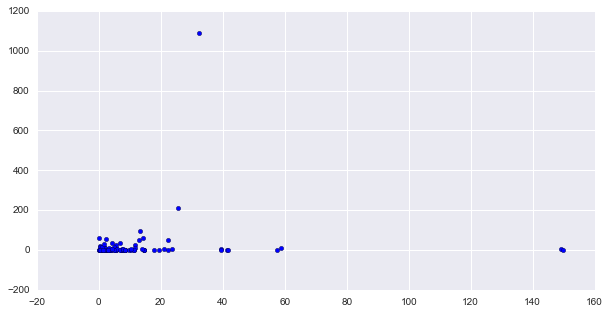

In [15]:
plt.subplots(figsize=(10,5))
plot_predict(knn, X_test, y_test)

# Support vector machine for regression

MSE: -599.3568546267248	std: 703.2702387123169
MAE: -8.867182386052288	std: 4.681161802132469
R2: -0.13763957922552272	std: 0.05249228357322999


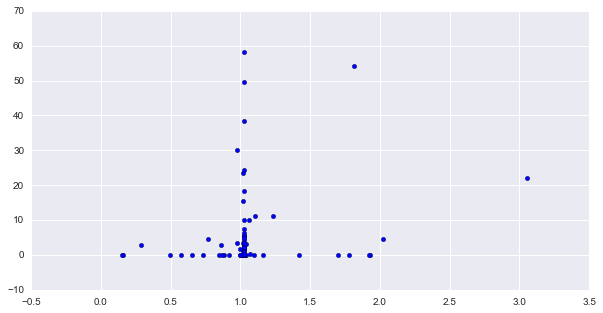

In [18]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

score(svr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(svr, X_test, y_test)

# Linear Regression

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


MSE: -2230.7245117217544	std: 5111.466723741079
MAE: -18.486498921071135	std: 6.227968902041857
R2: -0.3156009792171668	std: 0.599848019961518


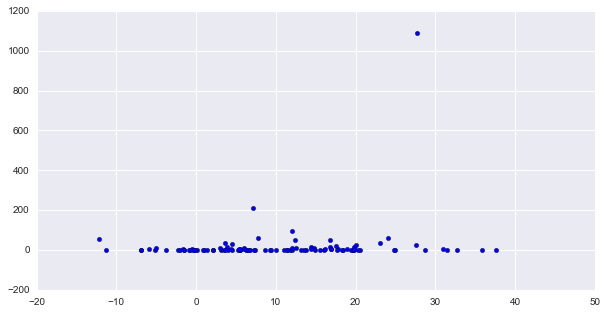

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

score(lr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(lr, X_test, y_test)

# Random forest regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

score(rfr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(rfr, X_test, y_test)

NameError: name 'score' is not defined

# Тюним признаки

Почему-то сразу на неподготовленных признаках ничего не работает? Но почему?

12.8472920696
0.52
0.0
1090.84


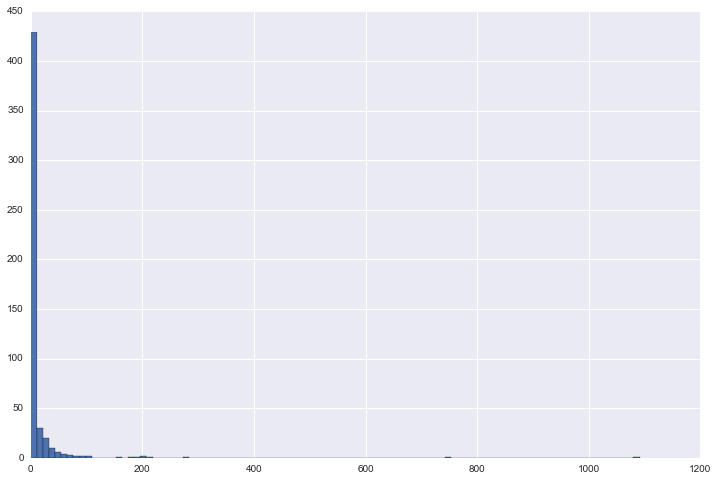

In [19]:
print(data['area'].mean())
print(data['area'].median())
print(data['area'].min())
print(data['area'].max())
plt.subplots(figsize=(12,8))
h=plt.hist(data['area'], bins=100)

Целевая переменная очень сильно смещена влево и имеет длинный хвост. В таких случаях обычно помогает логарифмирование.
Есть странный выброс.

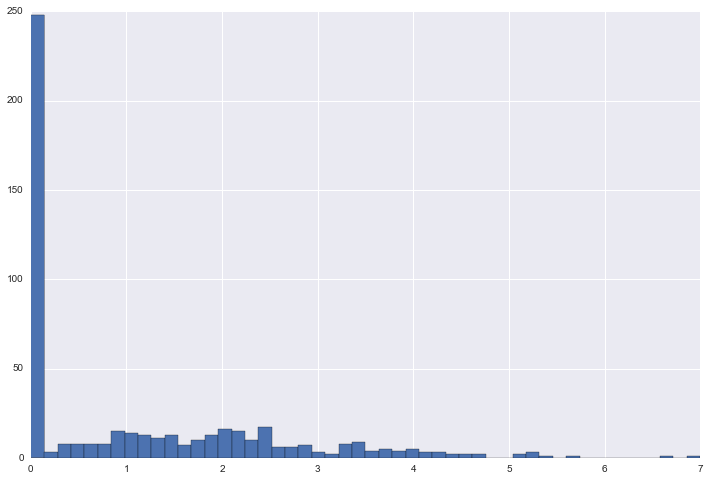

In [227]:
target = np.log(data['area'] + 1)
plt.subplots(figsize=(12,8))
h=plt.hist(target, bins=50)

In [25]:
# выбросы, можно удалить
data[data['area'] > 200]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53

In [3]:
# Выбрасываем аномалии

d = data[data['area'] < 200].copy()
X = d.drop(['area'], axis = 1)
X = pd.get_dummies(X, columns=categorical_columns)
y = d['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

NameError: name 'categorical_columns' is not defined

In [27]:
data.groupby(['rain'])['area'].count()

rain
0.0    509
0.2      2
0.4      1
0.8      2
1.0      1
1.4      1
6.4      1
Name: area, dtype: int64

MSE: -575.4166555570295	std: 404.3055889845724
MAE: -8.433811857287251	std: 1.3609162027932002
R2: -0.12004763382545658	std: 0.09749482854810779


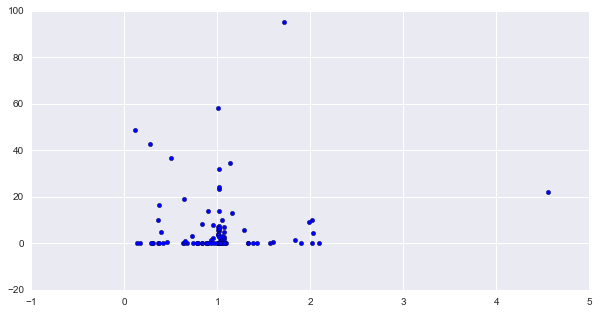

In [28]:
# Проверяем качество на данных без выбросов

svr = SVR()
svr.fit(X_train, y_train)

score(svr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(svr, X_test, y_test)

Можно предсказывать и тренироваться на логарифме целевой переменной. Потом делать обратное преобразование.

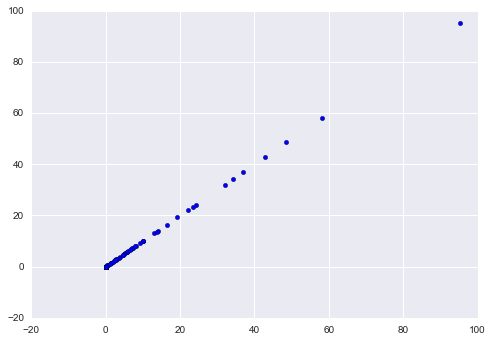

In [29]:
# Просто проверяем что наше преобразование легально
plt.scatter(x=np.power(np.e, np.log(y_test+1))-1, y=y_test)

MSE: -2.1885449309288934	std: 0.45538373277030886
MAE: -1.1758089527832125	std: 0.1167364650998175
R2: -0.24568512021386774	std: 0.16560052037950346


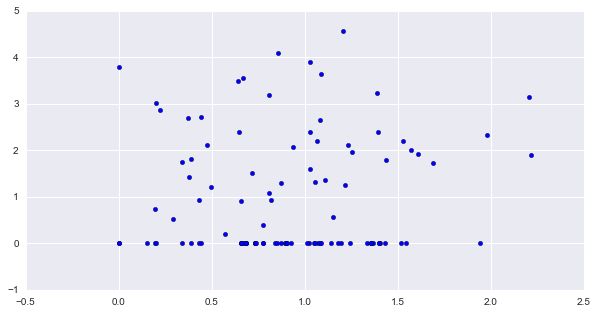

In [30]:
knr = KNeighborsRegressor()
knr.fit(X_train, np.log(y_train+1))

score(knr, X_train, np.log(y_train+1))
plt.subplots(figsize=(10,5))
plot_predict(knr, X_test, np.log(y_test+1))

214.688815412
6.35620164361


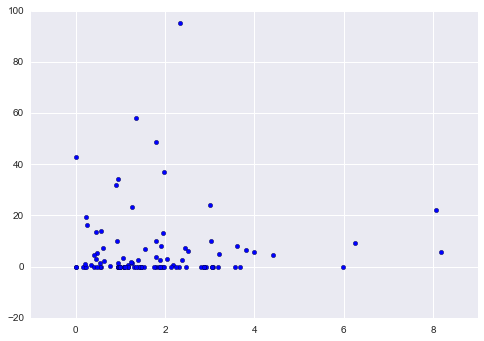

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = np.power(np.e, knr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

MSE: -2.1763462648757	std: 0.3032821767891901
MAE: -1.1801237290813977	std: 0.04613452188678818
R2: -0.2575883698127589	std: 0.2652239072797053


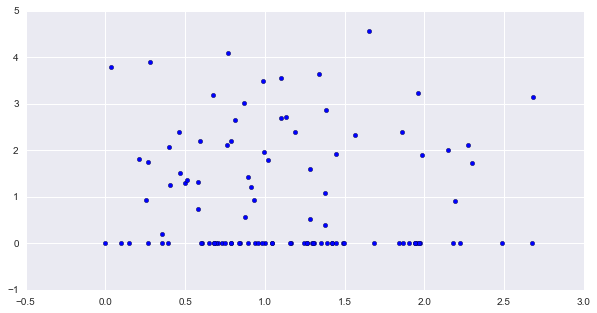

In [32]:
rfr = RandomForestRegressor()
rfr.fit(X_train, np.log(y_train+1))

score(rfr, X_train, np.log(y_train+1))
plt.subplots(figsize=(10,5))
plot_predict(rfr, X_test, np.log(y_test+1))

4.33706449361e+89
6.48902321371e+43


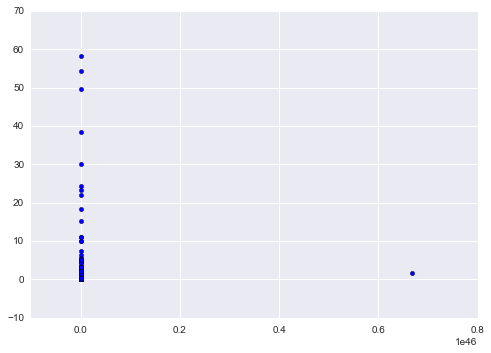

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = np.power(np.e, rfr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

In [34]:
def describeImportance(clf, X):
    indices = np.argsort(clf.feature_importances_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.feature_importances_[indices[f]]))

In [35]:
describeImportance(rfr, X)

1. feature 6 temp (0.159658)
2. feature 7 RH (0.112840)
3. feature 8 wind (0.108920)
4. feature 5 ISI (0.097592)
5. feature 3 DMC (0.080880)
6. feature 2 FFMC (0.077587)
7. feature 4 DC (0.071373)
8. feature 0 X (0.071035)
9. feature 1 Y (0.056091)
10. feature 25 day_sun (0.022648)
11. feature 27 day_tue (0.021708)
12. feature 24 day_sat (0.013848)
13. feature 28 day_wed (0.013477)
14. feature 21 month_sep (0.012859)
15. feature 26 day_thu (0.009977)
16. feature 18 month_may (0.008921)
17. feature 17 month_mar (0.008719)
18. feature 23 day_mon (0.008168)
19. feature 20 month_oct (0.007330)
20. feature 12 month_dec (0.007330)
21. feature 22 day_fri (0.007296)
22. feature 15 month_jul (0.007293)
23. feature 16 month_jun (0.007167)
24. feature 10 month_apr (0.002460)
25. feature 13 month_feb (0.002279)
26. feature 11 month_aug (0.001633)
27. feature 9 rain (0.000910)
28. feature 19 month_nov (0.000000)
29. feature 14 month_jan (0.000000)


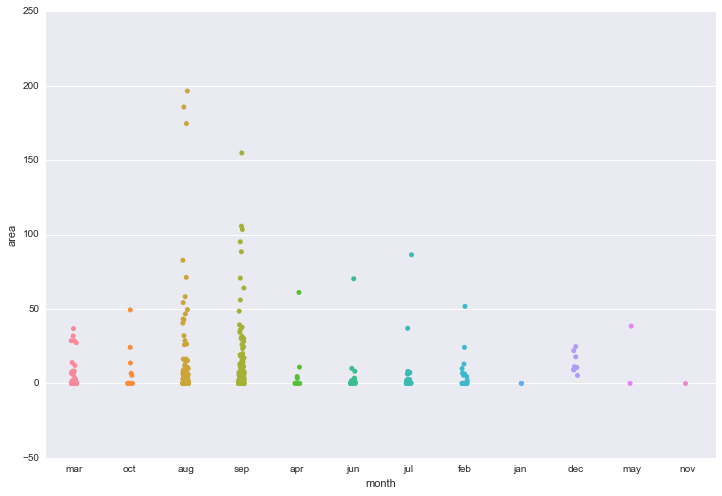

In [37]:
plt.subplots(figsize=(12,8))
sns.stripplot(x='month', y='area', data=d,jitter=0.05)

In [46]:
d.groupby(['month'])['area'].mean().sort_values()

month
jan     0.000000
nov     0.000000
mar     4.356667
jun     5.841176
jul     5.848387
feb     6.275000
oct     6.638000
aug     8.479290
apr     8.891111
sep     9.357811
dec    13.330000
may    19.240000
Name: area, dtype: float64

In [45]:
d.groupby(by=lambda r: d.ix[r, 'month'] in ['nov', 'dec', 'jan', 'feb', 'mar', 'apr'])['area'].mean().sort_values()

True     5.902632
False    8.517578
Name: area, dtype: float64

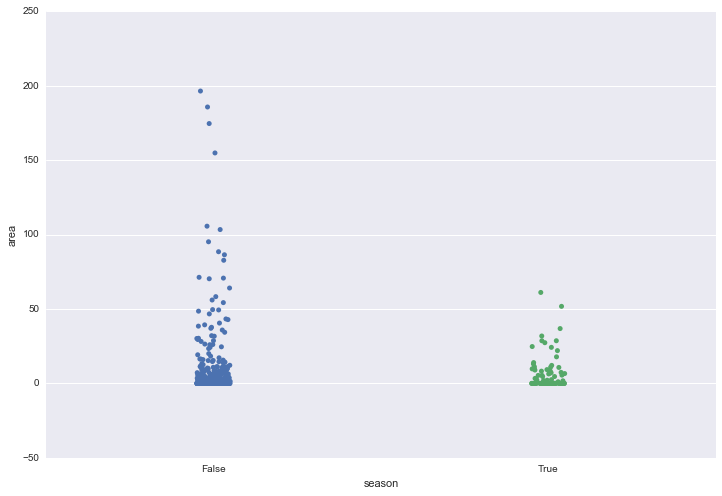

In [92]:
d['season'] = d['month'].apply(lambda r: r in ['nov', 'dec', 'jan', 'feb', 'mar', 'apr'])
plt.subplots(figsize=(12,8))
sns.stripplot(x='season', y='area', data=d,jitter=0.05)

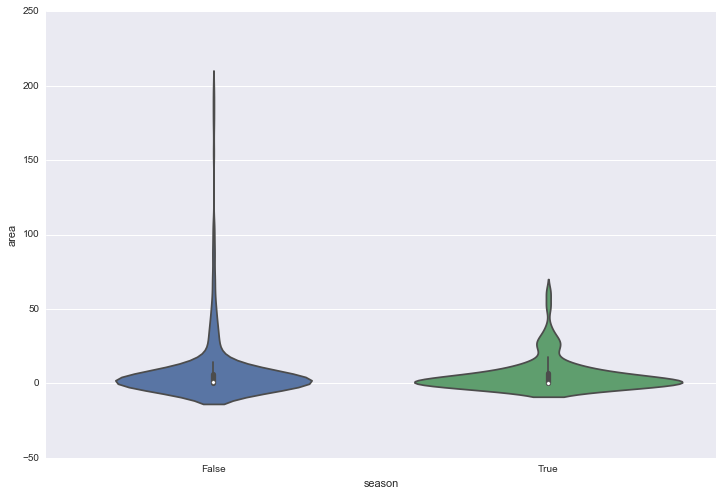

In [93]:
plt.subplots(figsize=(12,8))
sns.violinplot(x='season', y='area', data=d)

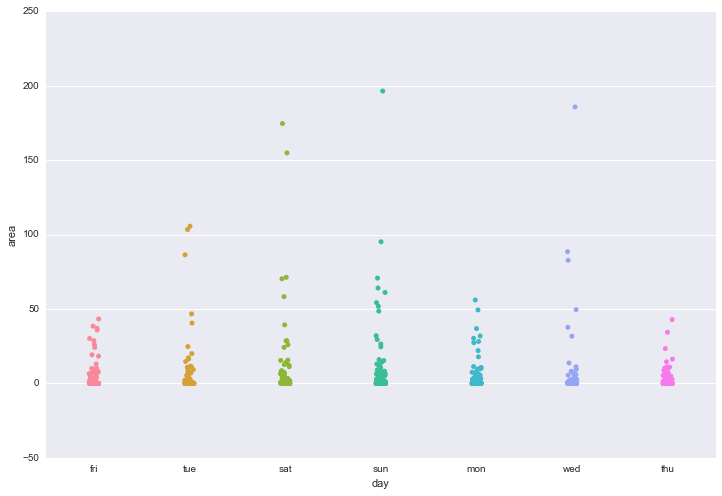

In [38]:
plt.subplots(figsize=(12,8))
sns.stripplot(x='day', y='area', data=d,jitter=0.05)

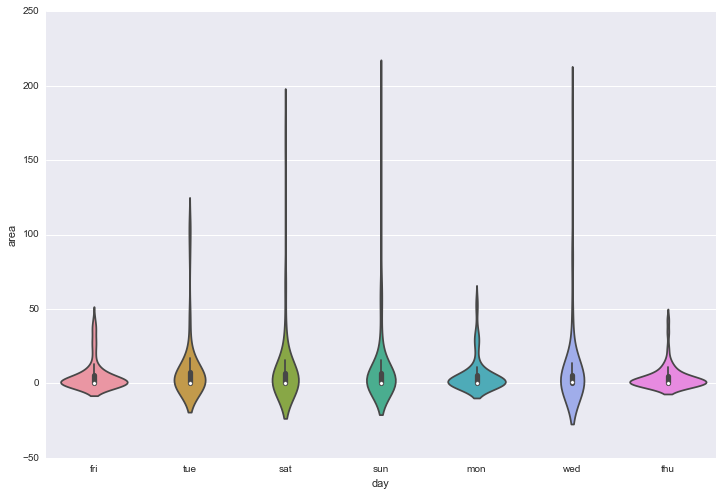

In [91]:
plt.subplots(figsize=(12,8))
sns.violinplot(x='day', y='area', data=d)

In [54]:
d.groupby(['day'])['area'].mean().sort_values()

day
thu     4.180333
fri     5.261647
mon     5.863014
tue     9.443016
sun    10.104526
sat    10.403415
wed    10.714815
Name: area, dtype: float64

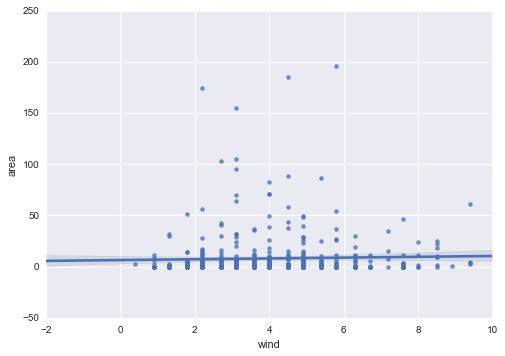

In [55]:
sns.regplot(x='wind', y='area', data=d)

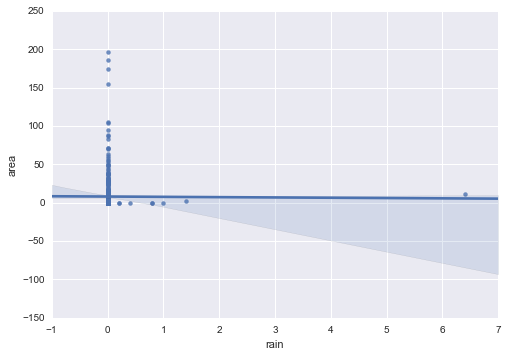

In [56]:
sns.regplot(x='rain', y='area', data=d)

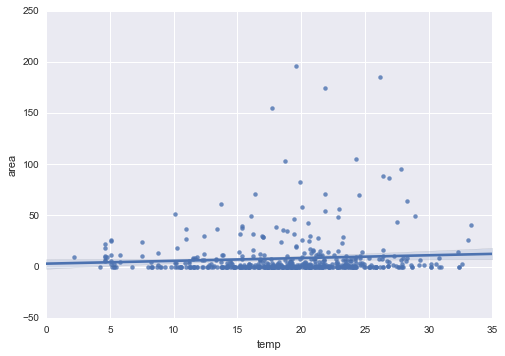

In [57]:
sns.regplot(x='temp', y='area', data=d)

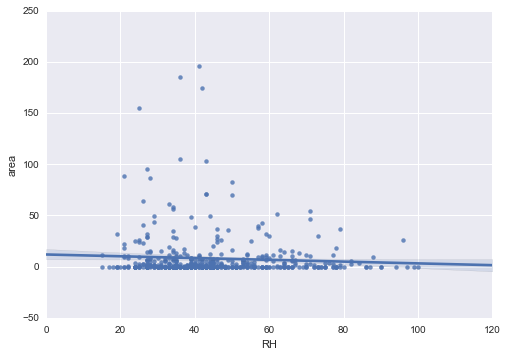

In [58]:
sns.regplot(x='RH', y='area', data=d)

In [59]:
d.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area season
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   True
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0  False
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0  False
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   True
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   True

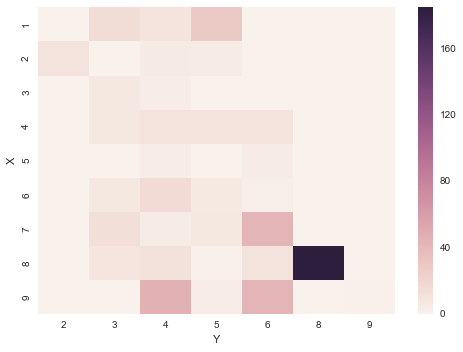

In [60]:
xy = d.groupby(['X', 'Y'], as_index=False)['area'].mean()
sns.heatmap(xy.pivot(index='X', columns='Y', values='area').fillna(0))

In [5]:
def prepare_data(data):
    d = data.copy() # удаляем аномалии
    xy = d.groupby(['X', 'Y'], as_index=False)['area'].mean().rename(columns={'area': 'area_xy'})
    d = d.merge(xy, on=['X', 'Y'])
    d['season'] = d['month'].apply(lambda r: r in ['nov', 'dec', 'jan', 'feb', 'mar', 'apr'])
    m = d.groupby(['month'], as_index=False)['area'].mean().rename(columns={'area': 'area_month'})
    d = d.merge(m, on='month')
    day = d.groupby(['day'], as_index=False)['area'].mean().rename(columns={'area': 'area_day'})
    d = d.merge(day, on='day')
    d['rainy'] = (d['rain'] >= 0.3)
    return d.drop(['X', 'Y', 'month', 'day'], axis=1)
    
d=prepare_data(data[data['area'] < 200])
d.head()

FFMC   DMC    DC   ISI  temp  RH  wind  rain  area    area_xy season  \
0  86.2  26.2  94.3   5.1   8.2  51   6.7   0.0  0.00   7.035455   True   
1  91.7  33.3  77.5   9.0   8.3  97   4.0   0.2  0.00  10.176863   True   
2  91.7  35.8  80.8   7.8  17.4  24   5.4   0.0  0.00  10.176863   True   
3  91.2  48.3  97.8  12.5  14.6  26   9.4   0.0  2.53   6.108542   True   
4  91.2  48.3  97.8  12.5  11.7  33   4.0   0.0  8.31   6.108542   True   

   area_month  area_day  rainy  
0    4.356667  5.261647  False  
1    4.356667  5.261647  False  
2    4.356667  5.261647  False  
3    4.356667  5.261647  False  
4    4.356667  5.261647  False

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
col = d.drop(['area'], axis=1).columns
X = scaler.fit_transform(d.drop(['area'], axis=1))
X = pd.DataFrame(X, index=d.index, columns=col)
y = d['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
X.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.800338 -1.316623 -1.820785 -0.858438 -1.834499  0.407977  1.493285   
1  0.192986 -1.205854 -1.888341 -0.005001 -1.817281  3.224118 -0.012307   
2  0.192986 -1.166851 -1.875071 -0.267597 -0.250436 -1.244975  0.768370   
3  0.102683 -0.971834 -1.806710  0.760905 -0.732542 -1.122534  2.998877   
4  0.102683 -0.971834 -1.806710  0.760905 -1.231866 -0.693991 -0.012307   

       rain   area_xy    season  area_month  area_day     rainy  
0 -0.073627 -0.100026  2.095107   -1.820409 -1.096501 -0.108893  
1  0.599535  0.215165  2.095107   -1.820409 -1.096501 -0.108893  
2 -0.073627  0.215165  2.095107   -1.820409 -1.096501 -0.108893  
3 -0.073627 -0.193027  2.095107   -1.820409 -1.096501 -0.108893  
4 -0.073627 -0.193027  2.095107   -1.820409 -1.096501 -0.108893

In [9]:
# Проверяем качество на данных без выбросов

svr = SVR()
svr.fit(X_train, y_train)

score(svr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(svr, X_test, y_test)

NameError: name 'SVR' is not defined

MSE: -542.7238277525605	std: 477.14794836654033
MAE: -12.125114472422968	std: 3.2985713964700043
R2: -0.28783608671780847	std: 1.0488471805771915


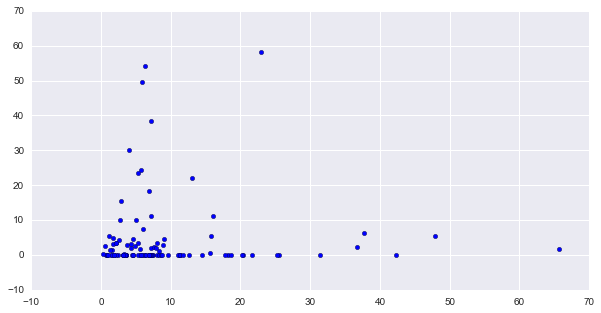

In [63]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

score(rfr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(rfr, X_test, y_test)

131.489360248
5.46634885449


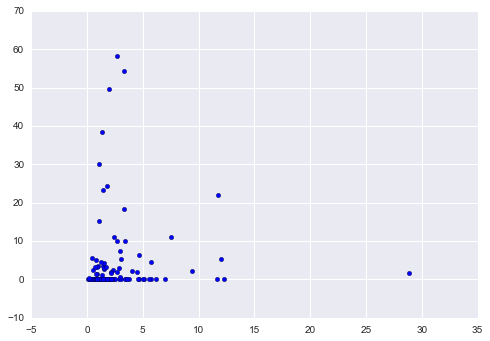

In [73]:
rfr.fit(X_train, np.log(y_train+1))
pred = np.power(np.e, rfr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

125.057089924
5.25468927955


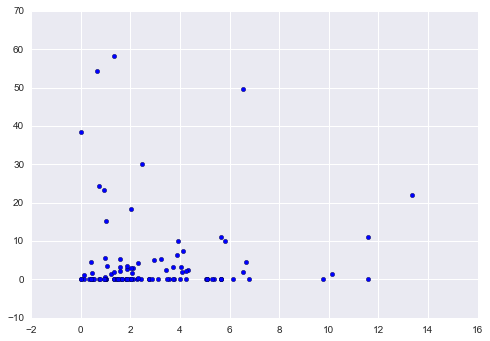

In [74]:
knr = KNeighborsRegressor()
knr.fit(X_train, np.log(y_train+1))

knr.fit(X_train, np.log(y_train+1))
pred = np.power(np.e, knr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

122.707208486
4.69034787338


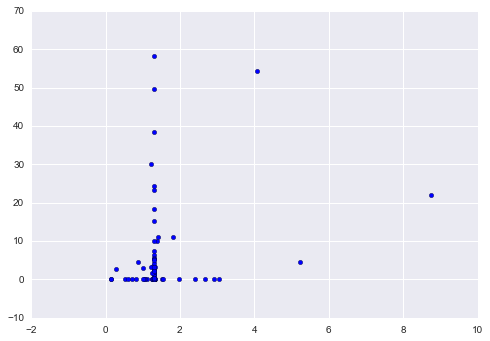

In [100]:
svr = SVR()
svr.fit(X_train, np.log(y_train+1))

svr.fit(X_train, np.log(y_train+1))
pred = np.power(np.e, svr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

Что бы еще сделать хорошего?

График предсказания/реальности сильно прижимается к 0 по оси Y - т.е. мы предсказываем значения переменной больше, чем это на самом деле!

Можно задачу свести к классификации - есть пожар vs нет пожара или регрессии без нулевого значения а потом объединять полученные предсказания разных моделей.

В данных мало примеров "аномалий". Возможно стоит нагенерировать больше данных, просто дублируюя уже существующие наблюдения.

In [101]:
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(n_estimators=200), X_train, y_train > 0.1, cv=3, scoring='roc_auc').mean()

0.62449767662857469

In [22]:
X_train.head()

FFMC    DMC     DC   ISI  temp  RH  wind  rain    area_xy season  \
320  91.6  273.8  819.1   7.7  21.3  44   4.5   0.0  12.180000  False   
329  90.1   51.2  424.1   6.2  24.6  43   1.8   0.0   2.938372  False   
173  92.4  124.1  680.7   8.5  16.9  60   1.3   0.0  11.039722  False   
272  87.1  291.3  860.6   4.0  17.0  67   4.9   0.0   6.108542  False   
491  94.8  108.3  647.1  17.0  24.6  22   4.5   0.0  10.904583  False   

     area_month   area_day  rainy  
320    8.479290  10.403415  False  
329    5.848387  10.403415  False  
173    9.357811  10.104526  False  
272    9.357811  10.403415  False  
491    8.479290   9.443016  False

MSE: -586.2265243978248	std: 689.1423244879735
MAE: -8.813655456433114	std: 4.6982971475646345
R2: -0.11013128134881534	std: 0.030183526598094278
124.260994212
4.63420905146


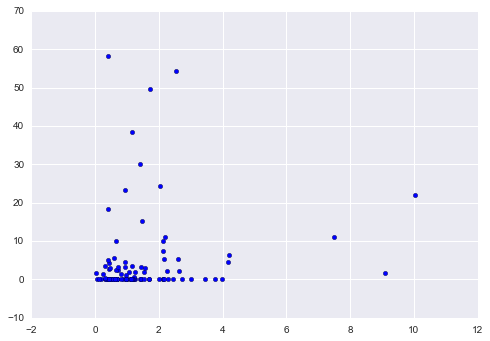

In [32]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=42)
score(reg, X_train, y_train)

reg.fit(X_train, np.log(y_train+1))

reg.fit(X_train, np.log(y_train+1))
pred = np.power(np.e, reg.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

In [114]:
d.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'area_xy', 'season', 'area_month', 'area_day', 'rainy'],
      dtype='object')

MSE: -661.8176974104498	std: 662.0669847800018
MAE: -13.50859233965673	std: 4.189843890723117
R2: -0.39340675224789506	std: 0.5465877287048237
118.890642834
5.15022685819


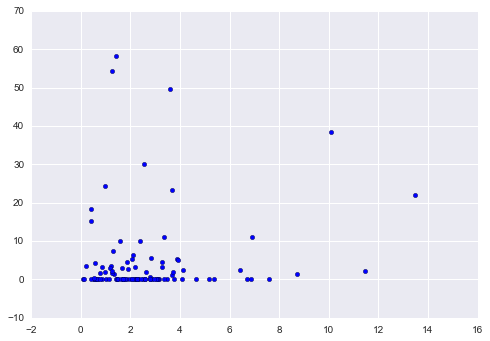

In [62]:
best_features = ['temp', 'wind', 'area_month', 'RH', 'rain']
from sklearn.preprocessing import PolynomialFeatures

reg = BaggingRegressor(base_estimator=KNeighborsRegressor(p=3,leaf_size=60), n_estimators=10, random_state=42)
poly = PolynomialFeatures(degree=2)
score(reg, poly.fit_transform(X_train[best_features]), y_train)

reg.fit(poly.fit_transform(X_train[best_features]), np.log(y_train+1))

pred = np.power(np.e, reg.predict(poly.fit_transform(X_test[best_features]))) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)